# Final exam - IST 652 - Notebook

Submitted by: Vinit Horakeri

Date: 12/15/2021

### Task 0 (10 points): Mention and summarize two key results from any of the final project presentations of a team that is not your own OR one result each from two different project presentations that are not your own. 


### Result 1 - Team that did basket ball analysis
### For the player Stephen Curry, he is better at scoring 3 pointers. He should focus on scoring 3 pointer often as his accuracy is greater.

### Result 2 - Analysis of Diabetes
### hereditary can be a cause for Diabetes, it is more likely for a person to be diabetic if his parents are diabetic

In [179]:
%matplotlib inline

import pandas as pd
import numpy as np
import requests
from io import StringIO
from io import BytesIO
from zipfile import ZipFile
import matplotlib.pyplot as plt 
np.set_printoptions(precision=4)
pd.options.display.max_rows = 20

!pip install plotly
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Loading data sets

## Bus ridership data sets

In [180]:
#Loading 2019 bus route SY36 dataset into Jupyter environment - a security warning will appear. You can ignore it.
#Be patient - it could take up to 2 minutes for the dataset to become available
urldata19="https://gitlab.gitlab.svc.cent-su.org/ccaicedo/652public/-/raw/master/datasets/busdata/BusActivity_SY36_2019.zip"
csvdata=requests.get(urldata19,verify=False).content

zf2019 = ZipFile(BytesIO(csvdata),'r')  #The dataset is being accessed from a zip file so this step is needed.

/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'gitlab.gitlab.svc.cent-su.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings



In [181]:
#Dataframe with bus activity data for 2019 for route SY36 is named data2019
data2019=pd.read_csv(zf2019.open("Preprocessed_SY36_2019.csv"))

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning:

Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.



In [182]:
#Loading 2020 bus route SY36 dataset into Jupyter environment - a security warning will appear. You can ignore it.
#Be patient - it could take up to 2 minutes for the dataset to become available
urldata20="https://gitlab.gitlab.svc.cent-su.org/ccaicedo/652public/-/raw/master/datasets/busdata/BusActivity_SY36_2020.zip"
csvdata=requests.get(urldata20,verify=False).content

zf2020 = ZipFile(BytesIO(csvdata),'r')  #The dataset is being accessed from a zip file so this step is needed.

/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'gitlab.gitlab.svc.cent-su.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings



In [183]:
#Dataframe with bus activity data for 2020 for route SY36 is named data2020
data2020=pd.read_csv(zf2020.open("Preprocessed_SY36_2020.csv"))

In [184]:
#Drop some columns that won't be needed
data2019.drop(['SURVEY_DATE','VEHICLE_DESCRIPTION','GARAGE_NAME','DIVISION_NAME','COMMENTS','WHEELCHAIRS','MODIFIED'],axis=1,inplace=True)
data2020.drop(['SURVEY_DATE','VEHICLE_DESCRIPTION','GARAGE_NAME','DIVISION_NAME','COMMENTS','WHEELCHAIRS','MODIFIED'],axis=1,inplace=True)

In [185]:
data2019.head()

,SERIAL_NUMBER,SCHEDULE_ID,SCHEDULE_NAME,PATTERN_ID,ROUTE_NUMBER,ROUTE_NAME,DIRECTION_NAME,BRANCH,TRIP_START_TIME,TIME_PERIOD,...,DWELL_TIME,RUNNING_TIME_ACTUAL,PASSENGERS_ON,PASSENGERS_OFF,PASSENGERS_IN,TIMEPOINT_MILES,FIRST_LAST_STOP,UNIQUE_ID,stop_lat,stop_lon
0,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,AM Peak,...,NaN,5.483,8,0,8,0.413,1,37100000002,43.043656,-76.150963
1,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,AM Peak,...,0.0,NaN,0,0,8,NaN,2,37100000003,43.044280,-76.147495
2,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,AM Peak,...,0.0,2.550,0,0,8,0.716,2,37100000005,43.045336,-76.147419
3,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,AM Peak,...,0.0,NaN,0,0,8,NaN,2,37100000006,43.047959,-76.147440
4,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,AM Peak,...,0.0,NaN,0,0,8,NaN,2,37100000007,43.049554,-76.148697


In [186]:
data2020.head()

,SERIAL_NUMBER,SCHEDULE_ID,SCHEDULE_NAME,PATTERN_ID,ROUTE_NUMBER,ROUTE_NAME,DIRECTION_NAME,BRANCH,TRIP_START_TIME,TIME_PERIOD,...,DWELL_TIME,RUNNING_TIME_ACTUAL,PASSENGERS_ON,PASSENGERS_OFF,PASSENGERS_IN,TIMEPOINT_MILES,FIRST_LAST_STOP,UNIQUE_ID,stop_lat,stop_lon
0,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,AM Peak,...,NaN,5.533,9,0,9,0.417,1,37100000002,43.043656,-76.150963
1,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,AM Peak,...,0.00,NaN,0,0,9,NaN,2,37100000003,43.044280,-76.147495
2,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,AM Peak,...,0.00,4.200,0,0,9,0.705,2,37100000005,43.045336,-76.147419
3,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,AM Peak,...,0.00,NaN,0,0,9,NaN,2,37100000006,43.047959,-76.147440
4,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,AM Peak,...,0.12,NaN,1,0,10,NaN,2,37100000007,43.049554,-76.148697


In [187]:
data2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980551 entries, 0 to 980550
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SERIAL_NUMBER        980551 non-null  int64  
 1   SCHEDULE_ID          980551 non-null  int64  
 2   SCHEDULE_NAME        980551 non-null  object 
 3   PATTERN_ID           980551 non-null  int64  
 4   ROUTE_NUMBER         980551 non-null  int64  
 5   ROUTE_NAME           980551 non-null  object 
 6   DIRECTION_NAME       980551 non-null  object 
 7   BRANCH               980551 non-null  object 
 8   TRIP_START_TIME      980551 non-null  object 
 9   TIME_PERIOD          980551 non-null  object 
 10  SERVICE_PERIOD       980551 non-null  object 
 11  TRIP_NUMBER          980551 non-null  int64  
 12  TRIP_KEY             980551 non-null  int64  
 13  BLOCK_NUMBER         980551 non-null  int64  
 14  BLOCK_KEY            980551 non-null  int64  
 15  BLOCK_NAME       

In [188]:
data2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962566 entries, 0 to 962565
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SERIAL_NUMBER        962566 non-null  int64  
 1   SCHEDULE_ID          962566 non-null  int64  
 2   SCHEDULE_NAME        962566 non-null  object 
 3   PATTERN_ID           962566 non-null  int64  
 4   ROUTE_NUMBER         962566 non-null  int64  
 5   ROUTE_NAME           962566 non-null  object 
 6   DIRECTION_NAME       962566 non-null  object 
 7   BRANCH               962566 non-null  object 
 8   TRIP_START_TIME      962566 non-null  object 
 9   TIME_PERIOD          962566 non-null  object 
 10  SERVICE_PERIOD       962566 non-null  object 
 11  TRIP_NUMBER          962566 non-null  int64  
 12  TRIP_KEY             962566 non-null  int64  
 13  BLOCK_NUMBER         962566 non-null  int64  
 14  BLOCK_KEY            962566 non-null  int64  
 15  BLOCK_NAME       

## 2019 Syracuse weather data

In [189]:
#Loading Syracuse Weather dataset into Jupyter environment - a security warning will appear. You can ignore it.
url_weatherdata="https://gitlab.gitlab.svc.cent-su.org/ccaicedo/652public/-/raw/master/syracuse_2019_weather.csv"
csvweatherdata=requests.get(url_weatherdata,verify=False).text  #this will generate a warning but you can proceed

/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'gitlab.gitlab.svc.cent-su.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings



In [190]:
#Setup the weather_2019 dataframe with the data from the weather dataset 
#You still need to set the column that will be the index
weather_2019=pd.read_csv(StringIO(csvweatherdata))

In [191]:
weather_2019.head()

,STATION,NAME,DATE,AWND,PRCP,SNOW,TAVG,TMAX,TMIN
0,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/1/2019,15.66,0.02,0.0,40,53,21
1,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/2/2019,5.14,0.00,0.0,24,31,18
2,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/3/2019,10.74,0.09,0.3,33,37,30
3,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/4/2019,4.70,0.00,0.0,36,49,25
4,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/5/2019,5.59,0.00,0.0,33,44,25


# Exam task solutions

Add the text/code/visualizations for your exam tasks solutions from this point onwards. Use as many additional cells as required. Please place long textual explanations or analysis in their own markdown cells, not as comments inside your code cells.

### Task 1 (30 points): For the year of 2019, determine the number of passengers that board thebus (PASSENGERS_ON) at a particular STOP_ID per day. Use this data to understand how the changes in weather affect the ridership at your selected Bus Stop. Select a bus stop with a daily annual average of at least 5 passengers using it (This means that for any service day of the year, on average, at least 5 passengers boarded the bus from that bus stop). 
 

In [192]:
## converting the object TRIP_START_TIME into datetime.
data2019['TRIP_START_TIME'] = pd.to_datetime(data2019['TRIP_START_TIME'])


In [193]:
data2019['TRIP_START_TIME_YYYY_DD_MM'] = data2019['TRIP_START_TIME'].dt.date
data2019['TRIP_START_TIME_YYYY_DD_MM'] = pd.to_datetime(data2019['TRIP_START_TIME_YYYY_DD_MM'])

### Number of passengers boarding at all stop IDs per day in 2019


In [194]:
## Number of passengers boarding at all stop ids per day
cols = ['TRIP_START_TIME_YYYY_DD_MM', 'STOP_ID']
df_pass_count = data2019.groupby(cols)[["PASSENGERS_ON"]].sum()
df_pass_count.head(1000)

PASSENGERS_ON
TRIP_START_TIME_YYYY_DD_MM STOP_ID               
2019-01-01                 100                  0
                           611                  8
                           612                  6
                           619                  0
                           621                  0
...                                           ...
2019-01-07                 740                  1
                           747                  0
                           750                  0
                           751                  1
                           757                  0

[1000 rows x 1 columns]

### Number of passengers boarding at 14615 each in 2019 day


In [195]:
df_particular_14615_passengers = data2019.loc[(data2019['STOP_ID'] == 14615) & (data2019['PASSENGERS_ON'] >= 0)]
df_particular_14615_passengers_1 = df_particular_14615_passengers.groupby(cols)[["PASSENGERS_ON"]].sum()
df_particular_14615_passengers_1

,,PASSENGERS_ON
TRIP_START_TIME_YYYY_DD_MM,STOP_ID,
2019-01-01,14615,0
2019-01-02,14615,1
2019-01-03,14615,4
2019-01-04,14615,1
2019-01-05,14615,1
...,...,...
2019-12-27,14615,5
2019-12-28,14615,1
2019-12-29,14615,0


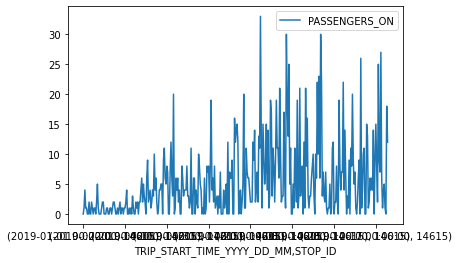

In [196]:
## Passenger datewise plot
df_particular_14615_passengers_1.plot.line()
plt.show()

In [197]:
# getting the month of the year
df_particular_stop_id_passengers_m = df_particular_14615_passengers.groupby(pd.Grouper(freq='M', key='TRIP_START_TIME_YYYY_DD_MM')).mean()
# Bus stop with daily average of atleast 5 passengers
davg_df2 = df_particular_14615_passengers.groupby(pd.Grouper(freq='D', key='TRIP_START_TIME_YYYY_DD_MM')).mean()
df_gt3 = davg_df2.loc[(davg_df2['PASSENGERS_ON'] > 3) ]
df_gt3['STOP_ID']

TRIP_START_TIME_YYYY_DD_MM
2019-09-01    14615.0
2019-10-12    14615.0
Freq: 41D, Name: STOP_ID, dtype: float64

In [198]:
## Passenger count plot for stop id 14615
fig=go.Figure()
fig.add_trace(go.Scatter(x=df_particular_14615_passengers.TRIP_START_TIME_YYYY_DD_MM, y=df_particular_14615_passengers["PASSENGERS_ON"],
                    mode='lines',
                    name=' Passenger count for stop id 14615'))
fig.update_layout(title=" Passenger count for stop id 14615",
                 xaxis_title="Date",yaxis_title=" Passenger count for stop id 14615",legend=dict(x=0,y=1,traceorder="normal"))

fig.show()

#### how the changes in weather affect the ridership at 14615 Bus Stop


In [199]:
#how the changes in weather affect the ridership at your selected Bus Stop
weather_2019['DATE'] = pd.to_datetime(weather_2019['DATE'])
weather_2019['DATE_dd'] = weather_2019['DATE'].dt.date


#finding average temperature monthly

DATE_dd = weather_2019['DATE_dd']
df1 = weather_2019.groupby(DATE_dd)['TAVG'].mean()


df1.index


Index([2019-01-01, 2019-01-02, 2019-01-03, 2019-01-04, 2019-01-05, 2019-01-06,
       2019-01-07, 2019-01-08, 2019-01-09, 2019-01-10,
       ...
       2019-12-22, 2019-12-23, 2019-12-24, 2019-12-25, 2019-12-26, 2019-12-27,
       2019-12-28, 2019-12-29, 2019-12-30, 2019-12-31],
      dtype='object', name='DATE_dd', length=365)

In [200]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df_particular_14615_passengers.TRIP_START_TIME_YYYY_DD_MM, y=df_particular_14615_passengers["PASSENGERS_ON"],
                    mode='lines',
                    name='Passenger count for stop id 14615'))
fig.add_trace(go.Scatter(x=df1.index, y=df1,mode='lines',
                    name=' Temperature AVG'))
fig.update_layout(title=" Temperature vs Passenger count for stop id 14615",
                 xaxis_title="Date",yaxis_title=" Temperature vs Passenger count for stop id 14615",legend=dict(x=0,y=1,traceorder="normal"))

fig.show()

### From the above analysis it is clear that, as the temperature decreases the bus ridership decreases. In january to march where the temperature was lowest, the bus ridership was the least.

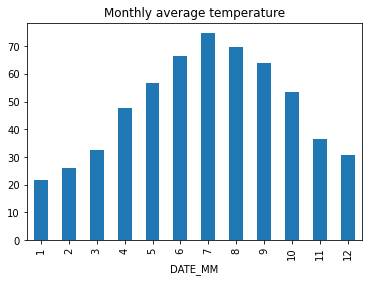

In [201]:
#how the changes in weather affect the ridership at your selected Bus Stop
weather_2019['DATE'] = pd.to_datetime(weather_2019['DATE'])
weather_2019['DATE_MM'] = weather_2019['DATE'].dt.month


#finding average temperature monthly

DATE_MM = weather_2019['DATE_MM']
df1 = weather_2019.groupby(DATE_MM)['TAVG'].mean()


df1.plot.bar()
plt.title("Monthly average temperature")
plt.show()


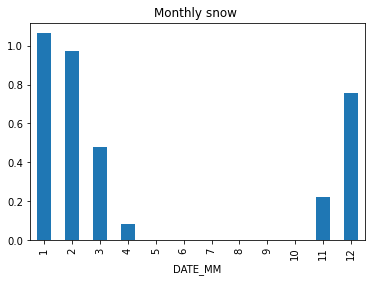

In [202]:
#finding average Snow monthly
DATE_MM = weather_2019['DATE_MM']
df2 = weather_2019.groupby(DATE_MM)['SNOW'].mean()

df2.plot.bar()
plt.title("Monthly snow ")
plt.show()


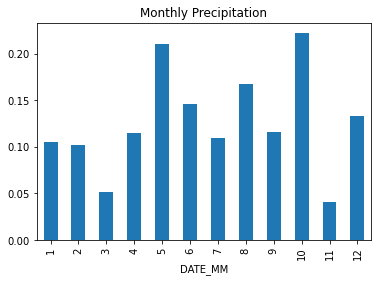

In [203]:
#finding average precipitation monthly
DATE_MM = weather_2019['DATE_MM']
df3 = weather_2019.groupby(DATE_MM)['PRCP'].mean()

df3.plot.bar()
plt.title("Monthly Precipitation")
plt.show()

### Weather and ridership relationship

### From the above analysis it is clear that, as the temperature decreases the bus ridership decreases. In january to march where the temperature was lowest, the bus ridership was the least.

### As the snow increases, the bus ridership decreases. In the month of January to march where snow is maximum the bus ridership at 14615 is the least.

### Also, one fact to consider is that the winter break might have also affected the bus ridership as many of the people go on holidays.


## Subtask 1.1 (+10 points): Group the activity at the selected bus stop per month and compare against the average temperature for that month 

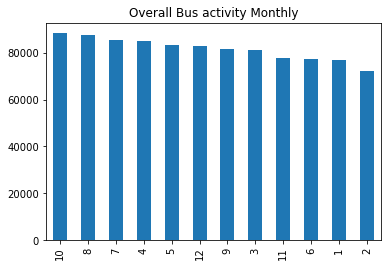

In [204]:
## Overall Bus activity Monthly

data2019['Date_MM'] = data2019['TRIP_START_TIME_YYYY_DD_MM'].dt.month
month_count = data2019['Date_MM'].value_counts()
month_count.plot.bar()
plt.title("Overall Bus activity Monthly")
plt.show()



### Number of passengers boarding at all stop ids per day Monthly


In [205]:
## Number of passengers boarding at all stop ids per day Monthly
cols = ['Date_MM', 'STOP_ID']
df_pass_count_monthly = data2019.groupby(cols)[["PASSENGERS_ON"]].sum()
df_pass_count_monthly

PASSENGERS_ON
Date_MM STOP_ID               
1       100                 11
        611                398
        612                295
        619                 10
        621                 40
...                        ...
12      17661             5264
        17676              146
        17677              311
        17823               39
        17824                6

[1933 rows x 1 columns]

###  Number of passengers boarding at 14615 each in 2019 each month


In [206]:
df_particular_14615_passengers_monthly = data2019.loc[(data2019['STOP_ID'] == 14615) & (data2019['PASSENGERS_ON'] >= 0)]
df_particular_14615_passengers_monthly_1 = df_particular_14615_passengers_monthly.groupby(cols)[["PASSENGERS_ON"]].sum()
df_particular_14615_passengers_monthly_1
### getting the month of the year 
## 1 is jan, 2 is feb, 3 is march, and so on 12 is december

,,PASSENGERS_ON
Date_MM,STOP_ID,
1,14615,29
2,14615,24
3,14615,91
4,14615,150
5,14615,120
6,14615,118
7,14615,217
8,14615,299
9,14615,257


In [207]:
df_particular_14615_passengers_monthly.columns

Index(['SERIAL_NUMBER', 'SCHEDULE_ID', 'SCHEDULE_NAME', 'PATTERN_ID',
       'ROUTE_NUMBER', 'ROUTE_NAME', 'DIRECTION_NAME', 'BRANCH',
       'TRIP_START_TIME', 'TIME_PERIOD', 'SERVICE_PERIOD', 'TRIP_NUMBER',
       'TRIP_KEY', 'BLOCK_NUMBER', 'BLOCK_KEY', 'BLOCK_NAME', 'RUN_NUMBER',
       'RUN_KEY', 'VEHICLE_NUMBER', 'VEHICLE_SEATS', 'OPERATOR_ID',
       'SORT_ORDER', 'STOP_ID', 'MAIN_CROSS_STREET', 'TRAVEL_DIRECTION',
       'TIMEPOINT', 'SEGMENT_MILES', 'TIME_SCHEDULED', 'TIME_ACTUAL_ARRIVE',
       'TIME_ACTUAL_DEPART', 'DWELL_TIME', 'RUNNING_TIME_ACTUAL',
       'PASSENGERS_ON', 'PASSENGERS_OFF', 'PASSENGERS_IN', 'TIMEPOINT_MILES',
       'FIRST_LAST_STOP', 'UNIQUE_ID', 'stop_lat', 'stop_lon',
       'TRIP_START_TIME_YYYY_DD_MM', 'Date_MM'],
      dtype='object')

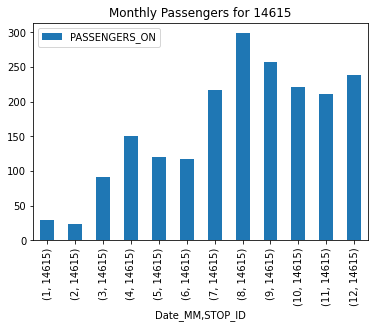

In [208]:
df_particular_14615_passengers_monthly_1.plot.bar()
plt.title("Monthly Passengers for 14615")
plt.show()




### Passenger count is lowest for January, Febraury, March due to the low temperature and heavy snow.
### As the temperature increased, the passenger count also increased.

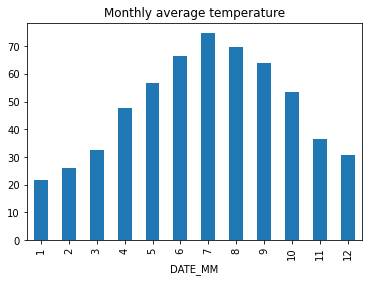

In [209]:
#how the changes in weather affect the ridership at your selected Bus Stop
weather_2019['DATE'] = pd.to_datetime(weather_2019['DATE'])
weather_2019['DATE_MM'] = weather_2019['DATE'].dt.month


#finding average temperature monthly

DATE_MM = weather_2019['DATE_MM']
df1 = weather_2019.groupby(DATE_MM)['TAVG'].mean()


df1.plot.bar()
plt.title("Monthly average temperature")
plt.show()


In [210]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df1.index, y=df_particular_14615_passengers_monthly_1["PASSENGERS_ON"],
                    mode='lines',
                    name='Passenger count for stop id 14615'))
fig.add_trace(go.Scatter(x=df1.index, y=df1,mode='lines',
                    name=' Temperature AVG in fahrenheit'))
fig.update_layout(title=" Temperature in fahrenheit vs Passenger count for stop id 14615",
                 xaxis_title="Month of the year",yaxis_title=" Temperature vs Passenger count for stop id 14615",legend=dict(x=0,y=1,traceorder="normal"))

fig.show()

### Passenger count is lowest for January, Febraury, March due to the low temperature and heavy snow.
### As the temperature increased, the passenger count also increased.

### Subtask 1.2 (+10 points): Compare the activity between 2 or more bus stops over each month of the year 

In [211]:
### Number of passengers boarding at 14615 each in 2019 day

df_particular_14615_passengers_monthly_14615 = data2019.loc[(data2019['STOP_ID'] == 14615) & (data2019['PASSENGERS_ON'] >= 0)]
df_particular_14615_passengers_monthly_14615_1 = df_particular_14615_passengers_monthly_14615.groupby(cols)[["PASSENGERS_ON"]].sum()
df_particular_14615_passengers_monthly_14615_1

,,PASSENGERS_ON
Date_MM,STOP_ID,
1,14615,29
2,14615,24
3,14615,91
4,14615,150
5,14615,120
6,14615,118
7,14615,217
8,14615,299
9,14615,257


In [212]:
### Number of passengers boarding at 17661 each in 2019 day

df_particular_passengers_monthly_17661 = data2019.loc[(data2019['STOP_ID'] == 17661) & (data2019['PASSENGERS_ON'] >= 0)]
df_particular_passengers_monthly_17661_1 = df_particular_passengers_monthly_17661.groupby(cols)[["PASSENGERS_ON"]].sum()
df_particular_passengers_monthly_17661_1

,,PASSENGERS_ON
Date_MM,STOP_ID,
1,17661,4264
2,17661,4111
3,17661,4876
4,17661,5284
5,17661,5078
6,17661,4498
7,17661,5068
8,17661,5735
9,17661,5901


In [213]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df1.index, y=df_particular_14615_passengers_monthly_14615_1["PASSENGERS_ON"],
                    mode='lines',
                    name='Passenger count for stop id 14615'))
fig.add_trace(go.Scatter(x=df1.index, y=df_particular_passengers_monthly_17661_1["PASSENGERS_ON"],mode='lines',
                    name='Passenger count for stop id 17661'))
fig.update_layout(title=" Passenger count for stop id 17661 vs Passenger count for stop id 14615",
                 xaxis_title="Month of the year",yaxis_title="  Passenger count for stop id 17661 vs 14615",legend=dict(x=0,y=1,traceorder="normal"))

fig.show()

### As we can see from the above plot, Passenger count for stop 17661 is in range of 4000 to 6000 each month 
### and for stop id 14615 it is below 1000 every month

### Subtask 1.3 (+10 points): Determine the 5 bus stops that provide the highest average number of daily passengers during the year 

In [214]:
## Top 5 bus stops with highest average daily passengers
cols = ['TRIP_START_TIME_YYYY_DD_MM', 'STOP_ID']
df_pass_count = data2019.groupby(cols)[["PASSENGERS_ON"]].mean()
means = data2019.groupby('STOP_ID').mean()
df_pass_count.nlargest(10000,'PASSENGERS_ON')

,,PASSENGERS_ON
TRIP_START_TIME_YYYY_DD_MM,STOP_ID,
2019-08-31,17661,10.533333
2019-11-02,17661,10.333333
2019-11-09,17661,9.533333
2019-11-16,17661,9.363636
2019-09-02,17661,9.307692
...,...,...
2019-05-13,14616,0.225806
2019-06-18,3758,0.225806
2019-09-17,14616,0.225806


### 5 bus stops that provide the highest average number of daily passengers during the year are 3761, 1114, 17661, 14616, 14615 

### Task 2 (30 points): For the years of 2019 and 2020, determine the number of passengers that board the bus (PASSENGERS_ON) at a particular STOP_ID per week. Select a bus stop where you would expect a high number of users (i.e. Near a shopping mall, school, hospital, etc). Compare the ridership activity between the two years and mention any hypothesis as to why changes could have taken place. 

In [215]:
### Converting the date time object and fetching the week of the year from the range 0 to 52
data2019['TRIP_START_TIME_WW'] = data2019['TRIP_START_TIME_YYYY_DD_MM'].dt.strftime('%U')
data2019

,SERIAL_NUMBER,SCHEDULE_ID,SCHEDULE_NAME,PATTERN_ID,ROUTE_NUMBER,ROUTE_NAME,DIRECTION_NAME,BRANCH,TRIP_START_TIME,TIME_PERIOD,...,PASSENGERS_OFF,PASSENGERS_IN,TIMEPOINT_MILES,FIRST_LAST_STOP,UNIQUE_ID,stop_lat,stop_lon,TRIP_START_TIME_YYYY_DD_MM,Date_MM,TRIP_START_TIME_WW
0,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00,AM Peak,...,0,8,0.413,1,37100000002,43.043656,-76.150963,2019-01-01,1,00
1,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00,AM Peak,...,0,8,NaN,2,37100000003,43.044280,-76.147495,2019-01-01,1,00
2,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00,AM Peak,...,0,8,0.716,2,37100000005,43.045336,-76.147419,2019-01-01,1,00
3,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00,AM Peak,...,0,8,NaN,2,37100000006,43.047959,-76.147440,2019-01-01,1,00
4,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00,AM Peak,...,0,8,NaN,2,37100000007,43.049554,-76.148697,2019-01-01,1,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980546,3290357,317,Dec19 (Weekday),191201024,371,SY36,TO HUB,[sy36]Inbound 136 to B18,2019-12-31 17:20:00,PM Peak,...,0,11,NaN,2,37101125029,43.047136,-76.147503,2019-12-31,12,52
980547,3290357,317,Dec19 (Weekday),191201024,371,SY36,TO HUB,[sy36]Inbound 136 to B18,2019-12-31 17:20:00,PM Peak,...,0,11,0.349,2,37101125031,43.045623,-76.147629,2019-12-31,12,52
980548,3290357,317,Dec19 (Weekday),191201024,371,SY36,TO HUB,[sy36]Inbound 136 to B18,2019-12-31 17:20:00,PM Peak,...,0,11,NaN,2,37101125032,43.044405,-76.147532,2019-12-31,12,52
980549,3290357,317,Dec19 (Weekday),191201024,371,SY36,TO HUB,[sy36]Inbound 136 to B18,2019-12-31 17:20:00,PM Peak,...,0,11,NaN,2,37101125033,43.044344,-76.148716,2019-12-31,12,52


In [216]:
## Number of passengers boarding at all stop ids per day
cols = ['TRIP_START_TIME_WW', 'STOP_ID']
df_pass_count = data2019.groupby(cols)[["PASSENGERS_ON"]].sum()
df_pass_count

PASSENGERS_ON
TRIP_START_TIME_WW STOP_ID               
00                 100                  4
                   611                 67
                   612                 52
                   619                  4
                   621                  3
...                                   ...
52                 17661              538
                   17676               14
                   17677               24
                   17823                7
                   17824                0

[8523 rows x 1 columns]

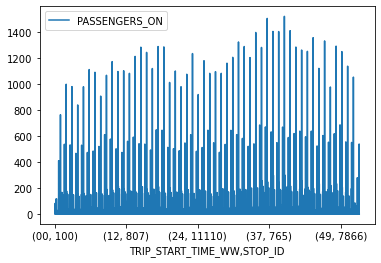

In [217]:
## Plot to show number of passengers from week 0 to 52
df_pass_count.plot.line()
plt.show()

In [218]:
### Number of passengers boarding at 1114 each in 2019 day

df_weekly_1114 = data2019.loc[(data2019['STOP_ID'] == 1114) & (data2019['PASSENGERS_ON'] >= 0)]
df_weekly_1114_1 = df_weekly_1114.groupby(cols)[["PASSENGERS_ON"]].sum()
df_weekly_1114_1

,,PASSENGERS_ON
TRIP_START_TIME_WW,STOP_ID,
00,1114,118
01,1114,147
02,1114,111
03,1114,129
04,1114,151
...,...,...
48,1114,184
49,1114,169
50,1114,168


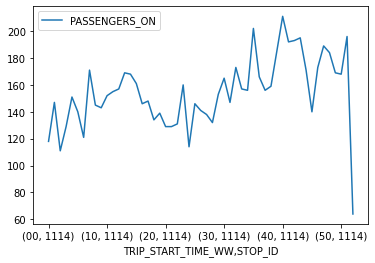

In [219]:
df_weekly_1114_1.plot.line()
plt.show()

In [220]:
### Number of passengers boarding at 1114 each in 2019 day
data2020['TRIP_START_TIME'] = pd.to_datetime(data2020['TRIP_START_TIME'])

data2020['TRIP_START_TIME_WW'] = data2020['TRIP_START_TIME'].dt.strftime('%U')
data2020

,SERIAL_NUMBER,SCHEDULE_ID,SCHEDULE_NAME,PATTERN_ID,ROUTE_NUMBER,ROUTE_NAME,DIRECTION_NAME,BRANCH,TRIP_START_TIME,TIME_PERIOD,...,RUNNING_TIME_ACTUAL,PASSENGERS_ON,PASSENGERS_OFF,PASSENGERS_IN,TIMEPOINT_MILES,FIRST_LAST_STOP,UNIQUE_ID,stop_lat,stop_lon,TRIP_START_TIME_WW
0,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00,AM Peak,...,5.533,9,0,9,0.417,1,37100000002,43.043656,-76.150963,00
1,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00,AM Peak,...,NaN,0,0,9,NaN,2,37100000003,43.044280,-76.147495,00
2,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00,AM Peak,...,4.200,0,0,9,0.705,2,37100000005,43.045336,-76.147419,00
3,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00,AM Peak,...,NaN,0,0,9,NaN,2,37100000006,43.047959,-76.147440,00
4,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00,AM Peak,...,NaN,1,0,10,NaN,2,37100000007,43.049554,-76.148697,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962561,3909763,345,Oct20 (Weekday),201001024,371,SY36,TO HUB,[Sy36]Inbound 136 to B18,2020-12-31 16:36:00,PM Peak,...,NaN,0,0,8,NaN,2,37101060804,NaN,NaN,52
962562,3909763,345,Oct20 (Weekday),201001024,371,SY36,TO HUB,[Sy36]Inbound 136 to B18,2020-12-31 16:36:00,PM Peak,...,1.633,0,0,8,0.391,2,37101060806,NaN,NaN,52
962563,3909763,345,Oct20 (Weekday),201001024,371,SY36,TO HUB,[Sy36]Inbound 136 to B18,2020-12-31 16:36:00,PM Peak,...,NaN,0,0,8,NaN,2,37101060807,NaN,NaN,52
962564,3909763,345,Oct20 (Weekday),201001024,371,SY36,TO HUB,[Sy36]Inbound 136 to B18,2020-12-31 16:36:00,PM Peak,...,NaN,0,0,8,NaN,2,37101060808,NaN,NaN,52


In [221]:
## Number of passengers boarding at all stop ids per day in 2020
cols = ['TRIP_START_TIME_WW', 'STOP_ID']
df_pass_count = data2020.groupby(cols)[["PASSENGERS_ON"]].sum()
df_pass_count

PASSENGERS_ON
TRIP_START_TIME_WW STOP_ID               
00                 -49                 29
                    100                 9
                    611                43
                    612                32
                    619                 4
...                                   ...
52                  17661             667
                    17676               8
                    17677              25
                    17823               2
                    17824               0

[8499 rows x 1 columns]

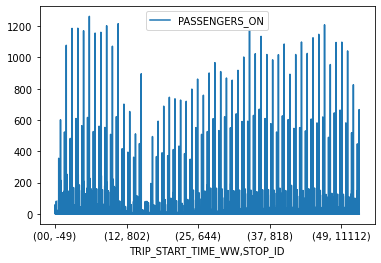

In [222]:
df_pass_count.plot.line()
plt.show()
## plot to show passenger count from week 0 to 52

In [223]:
### Number of passengers boarding at 1114 each in 2020 day

df_weekly_1114 = data2020.loc[(data2020['STOP_ID'] == 1114) & (data2020['PASSENGERS_ON'] >= 0)]
df_weekly_1114_2 = df_weekly_1114.groupby(cols)[["PASSENGERS_ON"]].sum()
df_weekly_1114_2

,,PASSENGERS_ON
TRIP_START_TIME_WW,STOP_ID,
00,1114,88
01,1114,147
02,1114,168
03,1114,160
04,1114,152
...,...,...
48,1114,110
49,1114,116
50,1114,113


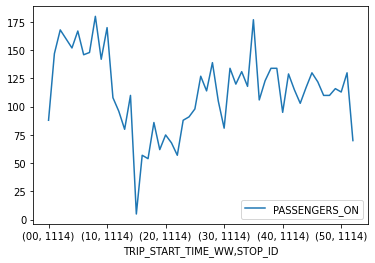

In [224]:
df_weekly_1114_2.plot.line()
plt.show()

In [225]:
weather_2019['DATE'] = pd.to_datetime(weather_2019['DATE'])
weather_2019['DATE_WW'] = weather_2019['DATE'].dt.strftime('%U')


#finding average temperature monthly

DATE_WW = weather_2019['DATE_WW']
df1 = weather_2019.groupby(DATE_WW)['TAVG'].mean()


### Subtask 2.1. (+5 points per hypothesis): Provide evidence to support that one of your hypothesis is likely true. They evidence could be in the form or newspaper articles, government declarations, etc

In [226]:

fig=go.Figure()
fig.add_trace(go.Scatter(x=df1.index, y=df_weekly_1114_1["PASSENGERS_ON"],
                    mode='lines',
                    name='Passenger count for stop id 1114 in 2019'))
fig.add_trace(go.Scatter(x=df1.index, y=df_weekly_1114_2["PASSENGERS_ON"],mode='lines',
                    name='Passenger count for stop id 1114 in 2020'))
fig.update_layout(title=" Passenger count for stop id 1114 in 2019 vs Passenger count for stop id 1114 in 2020",
                 xaxis_title="Week of the year",yaxis_title="  Passenger count for stop id 1114 in 2019 vs 2020",legend=dict(x=0,y=1,traceorder="normal"))

fig.show()

### The bus ridership fell from week 12 of 2020 and has been lower compared to 2019 ever since

### Hypothesis 1 - In March 2020, Onondaga county saw its first COVID-19 case and after that many new regulations were introduced related to public transport and mass gathering, this is the reason why there is fall in bus ridership in 2020 from week 12.

### Source - https://www.governor.ny.gov/news/video-audio-photos-rush-transcript-during-novel-coronavirus-briefing-governor-cuomo-announces-0

### hypotheses 2 - In November 2020, The us presidential election was conducted and people were busy in voting. During the week 41 to 46 a sudden drop in the ridership was witnessed and the election is the reason for the drop in ridership.

### Source - http://blog.dev.dailyorange.com/2020/11/syracuse-community-members-describe-barriers-voting-2020-election/


### hypotheses 3 - In June 2020, The Black lives matter movement took place, wherein large number of people took part in the protest. During this period that is week 20 to week 26 the bus ridership suddenly dropped and the black lives matter campaign is the reason for the drop in ridership.

### Source - http://blog.dev.dailyorange.com/2020/06/live-updates-1000-people-march-black-lives-matter-protest/

### Subtask 2.2. : Determine the 10 bus stops that provide the highest average number of weekly passengers for each year. Provide a brief comment on any differences that you find interesting. 


In [227]:
## 10 bus stops that provide the highest average number of weekly passengers
col = ['STOP_ID']
df_pass_cot = data2020.groupby(col)[["PASSENGERS_ON","TRIP_START_TIME_WW"]].mean()
df_top10 = df_pass_cot.nlargest(10,"PASSENGERS_ON")



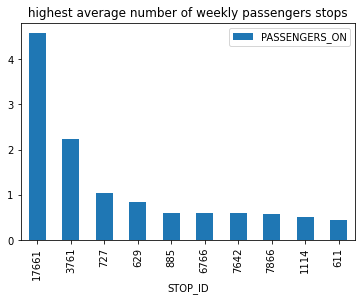

In [228]:
df_top10.plot.bar()
plt.title(" highest average number of weekly passengers stops ")
plt.show()

### 17661, 3761, 727, 629, 885, 6766, 7642, 7866, 1114, 611 are the top 10 stops

### Task 4 (20 points): For any of the years 2019 or 2020, study the differences between the time of arrival (TIME_ACTUAL_ARRIVE) and the scheduled bus time (TIME_SCHEDULED) to determine the hours of the day, or the weeks of the year (or some other time period) where significant deviations between the arrival time and the scheduled time appear. Deviations of more than 10 minutes can be considered significant but you can change this limit if it makes sense for your analysis 

In [229]:
data2019['TIME_ACTUAL_ARRIVE'] = pd.to_datetime(data2019['TIME_ACTUAL_ARRIVE'])

## converting the column to date time

In [230]:
data2019['TIME_SCHEDULED'] = pd.to_datetime(data2019['TIME_SCHEDULED'])
## converting the column to date time

In [231]:
data2019['Difference_in_Minutes'] = (data2019['TIME_ACTUAL_ARRIVE'] - data2019['TIME_SCHEDULED']).dt.total_seconds()/60

### doing a date difference to find out the deviations in scheduled and actual arrival times

In [232]:
df_late_arrival_bus = data2019.loc[(data2019['Difference_in_Minutes'] > 10) ]
df_late_arrival_bus

## subsetting using loc to get only above 10 minutes deviations

,SERIAL_NUMBER,SCHEDULE_ID,SCHEDULE_NAME,PATTERN_ID,ROUTE_NUMBER,ROUTE_NAME,DIRECTION_NAME,BRANCH,TRIP_START_TIME,TIME_PERIOD,...,PASSENGERS_IN,TIMEPOINT_MILES,FIRST_LAST_STOP,UNIQUE_ID,stop_lat,stop_lon,TRIP_START_TIME_YYYY_DD_MM,Date_MM,TRIP_START_TIME_WW,Difference_in_Minutes
2931,2604954,298,Sep18 (Weekday),180900491,371,SY36,FROM HUB,[Sy36]Outbound 036,2019-01-02 23:40:00,PM Late,...,4,2.431,2,37100003367,43.047585,-76.234278,2019-01-02,1,00,1435.633333
2952,2604954,298,Sep18 (Weekday),180900491,371,SY36,FROM HUB,[Sy36]Outbound 036,2019-01-02 23:40:00,PM Late,...,0,0.000,3,37100003389,43.038604,-76.271172,2019-01-02,1,00,1437.216667
3032,2604955,298,Sep18 (Weekday),180900644,371,SY36,FROM HUB,[Sy36]Outbound 136,2019-01-02 09:25:00,Midday,...,0,0.000,3,37100003483,43.038420,-76.311507,2019-01-02,1,00,10.816667
3176,2604959,298,Sep18 (Weekday),180900644,371,SY36,FROM HUB,[Sy36]Outbound 136,2019-01-02 12:30:00,Midday,...,0,0.000,3,37100003650,43.038420,-76.311507,2019-01-02,1,00,10.950000
3377,2604962,298,Sep18 (Weekday),180900716,371,SY36,TO HUB,[Sy36]Inbound 136 to A1,2019-01-02 15:15:00,PM Peak,...,8,2.546,2,37100003880,43.047585,-76.234278,2019-01-02,1,00,11.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977558,3284252,317,Dec19 (Weekday),191200491,371,SY36,FROM HUB,[sy36]Outbound 036,2019-12-31 23:40:00,PM Late,...,2,2.488,2,37101121744,43.047585,-76.234278,2019-12-31,12,52,1436.983333
977579,3284252,317,Dec19 (Weekday),191200491,371,SY36,FROM HUB,[sy36]Outbound 036,2019-12-31 23:40:00,PM Late,...,0,0.000,3,37101121766,43.038604,-76.271172,2019-12-31,12,52,1434.783333
979056,3284805,317,Dec19 (Weekday),191200644,371,SY36,FROM HUB,[sy36]Outbound 136,2019-12-31 09:25:00,Midday,...,0,0.000,3,37101123392,43.038420,-76.311507,2019-12-31,12,52,10.283333
979330,3284809,317,Dec19 (Weekday),191200644,371,SY36,FROM HUB,[sy36]Outbound 136,2019-12-31 12:30:00,Midday,...,7,2.425,2,37101123695,43.038604,-76.271172,2019-12-31,12,52,11.500000


### let's find late arrival counts per day i.e greater than 10 mins

In [233]:
## Number of passengers boarding at all stop ids per day
co = ['TRIP_START_TIME_YYYY_DD_MM']
df_pass_count1 = df_late_arrival_bus.groupby(co)[["Difference_in_Minutes"]].count()
df_pass_count1.head(1000)
## getting late arrival counts per day

,Difference_in_Minutes
TRIP_START_TIME_YYYY_DD_MM,
2019-01-02,9
2019-01-03,27
2019-01-04,14
2019-01-05,1
2019-01-07,8
...,...
2019-12-26,5
2019-12-27,5
2019-12-28,9


### Subtask 4.1 (+10 points): (For 2019 ONLY) Investigate if there is any relationship between weather conditions (temperature, wind, snow) with the deviations between time of arrival and scheduled bus time. Justify your analysis with graphs and documentation.

In [234]:
#how the changes in weather affect the ridership at your selected Bus Stop
weather_2019['DATE'] = pd.to_datetime(weather_2019['DATE'])
weather_2019['DATE_dd'] = weather_2019['DATE'].dt.date


#finding average temperature monthly

DATE_dd = weather_2019['DATE_dd']
df1 = weather_2019.groupby(DATE_dd)['TAVG'].mean()

df2 = weather_2019.groupby(DATE_dd)['SNOW'].mean()

df3 = weather_2019.groupby(DATE_dd)['PRCP'].mean()


In [235]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df_pass_count1.index, y=df_pass_count1["Difference_in_Minutes"],
                    mode='lines+markers',
                    name='number of delayed trips '))
fig.add_trace(go.Scatter(x=df1.index, y=df1,mode='lines',
                    name=' Temperature AVG'))
fig.update_layout(title=" number of delayed trips ",
                 xaxis_title="Date",yaxis_title=" number of delayed trips vs avg temp",legend=dict(x=0,y=1,traceorder="normal"))

fig.show()

In [236]:
### The number of delayed trips is less when the temperature is low from january to march 2019
### the number of delayed trips is higher during other time
### overall, there is no such strong pattern that gives an relation between the two

In [237]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df_pass_count1.index, y=df_pass_count1["Difference_in_Minutes"],
                    mode='lines+markers',
                    name='  number of delayed trips '))
fig.add_trace(go.Scatter(x=df2.index, y=df2,mode='lines',
                    name=' SNOW AVG'))
fig.update_layout(title="  number of delayed trips",
                 xaxis_title="Date",yaxis_title=" number of delayed trips vs avg temp",legend=dict(x=0,y=1,traceorder="normal"))

fig.show()

### Higher the snow more the delayed trips during the month of december 
###  also the delayed trips are more in the month from May to September 2019.
### overall there is no particualr pattern as such

In [238]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df_pass_count1.index, y=df_pass_count1["Difference_in_Minutes"],
                    mode='lines+markers',
                    name=' number of delayed trips vs avg temp'))

fig.update_layout(title="number of delayed trips",
                 xaxis_title="Date",yaxis_title=" number of delayed trips",legend=dict(x=0,y=1,traceorder="normal"))

fig.show()

In [239]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df3.index, y=df3,mode='lines',
                    name=' Avg PRCP'))
fig.update_layout(title="number of delayed trips",
                 xaxis_title="Date",yaxis_title=" avg Precipitation",legend=dict(x=0,y=1,traceorder="normal"))

fig.show()

### Precipitation and number of delayed trips are directly correlated.
### as the prcp increases, the delayed trips increases.